In [58]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [59]:
# Scikit Version
import sklearn
print(sklearn.__version__)

1.6.1


# Explore Data

In [60]:
# Load Data with the KaggleDatasetAdapter
data = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "uciml/mushroom-classification",
    "mushrooms.csv",
)

Using Colab cache for faster access to the 'mushroom-classification' dataset.


In [61]:
data = data.set_index('class')
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,
p,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
e,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
e,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
p,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
e,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


# Read Data

In [62]:
# Set classes
classes = np.array(data.index)
# Set data
matrix = np.array(data)

In [63]:
# Create Encoder
encoder = preprocessing.LabelEncoder()
# Set data to 1D
vector_data = np.reshape(matrix, (matrix.shape[0] * matrix.shape[1], 1))
# Encode Data
encoded_data = encoder.fit_transform(vector_data)
# Restore Dims
encoded_data = np.reshape(encoded_data, (matrix.shape[0], matrix.shape[1]))
# Encode Classes
encoded_classes = encoder.fit_transform(classes)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Prepare Training Dataset

In [64]:
# PREPARACIÓN DE DATOS
# Regresa 4 sets de datos:
X_train, X_test, y_train, y_test = train_test_split(encoded_data, encoded_classes, test_size=0.30, random_state=0)

# Train

In [65]:
# Clasificación K Nearest neighbors
k = 3
# Definición del clasificador, se le pasa el parámetro k
classifier = KNeighborsClassifier(n_neighbors=k)
# Entrenamiento del clasificador con lo datos de entrenamiento y valores de clase para cada ejemplo
classifier.fit(X_train, y_train)
# Predicción con el clasificador entrenado en los datos de evaluación
y_predict = classifier.predict(X_test)
# Primeros 5 datos test
print(X_test[:5])
print(y_test[:5])
# Lista de categorías predichas de los datos de evauación
print(y_predict[:5])

[[21 22 12 17 14  6  3 12 14  5  5 16 16 20 20 14 20 13 14  9 16 18]
 [ 6 22  7 17 12  6  3  2 14 17  2 16 16  7  7 14 20 13 14  9 22  4]
 [21 22 22 17  1  6  3  2  9  5  3 16 16 20 20 14 20 13 14 12 12 11]
 [21 16 20  6 12  6 20  2  9 17  5 16 16 20 20 14 20 13  5  9  1  7]
 [21  6 12 17 12  6  3  2 14 17  2 16 16 14 20 14 20 13 14 12 19  4]]
[1 0 0 0 0]
[1 0 0 0 0]


# Validate

In [66]:
print("Accuracy: {}".format(accuracy_score(y_test, y_predict))) ## ver si los datos están balanceados
print("Precision: {}".format(precision_score(y_test, y_predict, average="macro")))
print("Recall: {}".format(recall_score(y_test, y_predict, average="macro")))
print("F-score: {}".format(f1_score(y_test, y_predict, average="macro")))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-score: 1.0


In [67]:
target_names = ["Edible", "Poisonous"]
## Ver qué clases clasifica mejor y peor el modelo
# Support es el no. de ejemplos usados para evaluar cada clase
## Accracy general, macro es una medida global sumando todos los VP, FN.., el de peso es útil cuando hay desbalance de clases
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      1272
   Poisonous       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



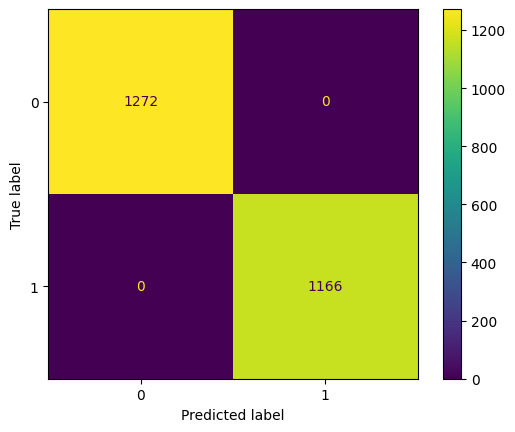

In [68]:
## Confussion Matrix: Real vs predicho
cm = confusion_matrix(y_test, y_predict, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()
plt.show()

# Predict

In [69]:
## PREDECIR DATOS NUEVOS
import random as rd

# Possible classes
number_predictions = 5
data_predict = [rd.sample(list(range(0,23)), k=encoded_data.shape[1]) for x in range(number_predictions)]
print(classifier.predict(data_predict))
print(classifier.predict_proba(data_predict)) ## proba de ser asignado a cada clase
print(classifier.kneighbors(data_predict))  ## vecinos usados para clasificar el ejemplo

[0 0 1 1 1]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
(array([[29.41088234, 30.16620626, 30.21588986],
       [35.28455753, 35.32704347, 35.63705936],
       [35.6931366 , 35.74912586, 35.81898938],
       [34.53983208, 34.53983208, 34.66987165],
       [35.31288717, 35.41186242, 35.53871129]]), array([[4911, 4339, 2866],
       [4876, 4541, 5645],
       [3916,  247, 3928],
       [5252,  116, 1894],
       [1993, 4974, 3962]]))
